In [8]:
import sys
sys.path.append('../')

import numpy as np
#from scipy import ndimage

from skimage.filters import sobel_h
from skimage.filters import sobel_v
#from scipy import stats


import os
import matplotlib
import matplotlib.pyplot as plt
#import scienceplots
from tensorflow.python.client import device_lib

#plt.rcParams['figure.figsize'] = [10,10]

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16

from tensorflow.nn import depthwise_conv2d
from tensorflow.math import multiply, reduce_sum, reduce_mean,reduce_euclidean_norm, sin, cos, abs
from tensorflow import stack, concat, expand_dims

#import tensorflow_probability as tfp

#from utils.utils import *
from scipy.fft import dct, idct, ifft2

#plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

#### Experiment #1 : Confirming that most energy lies within the first 3 DCT coeficients

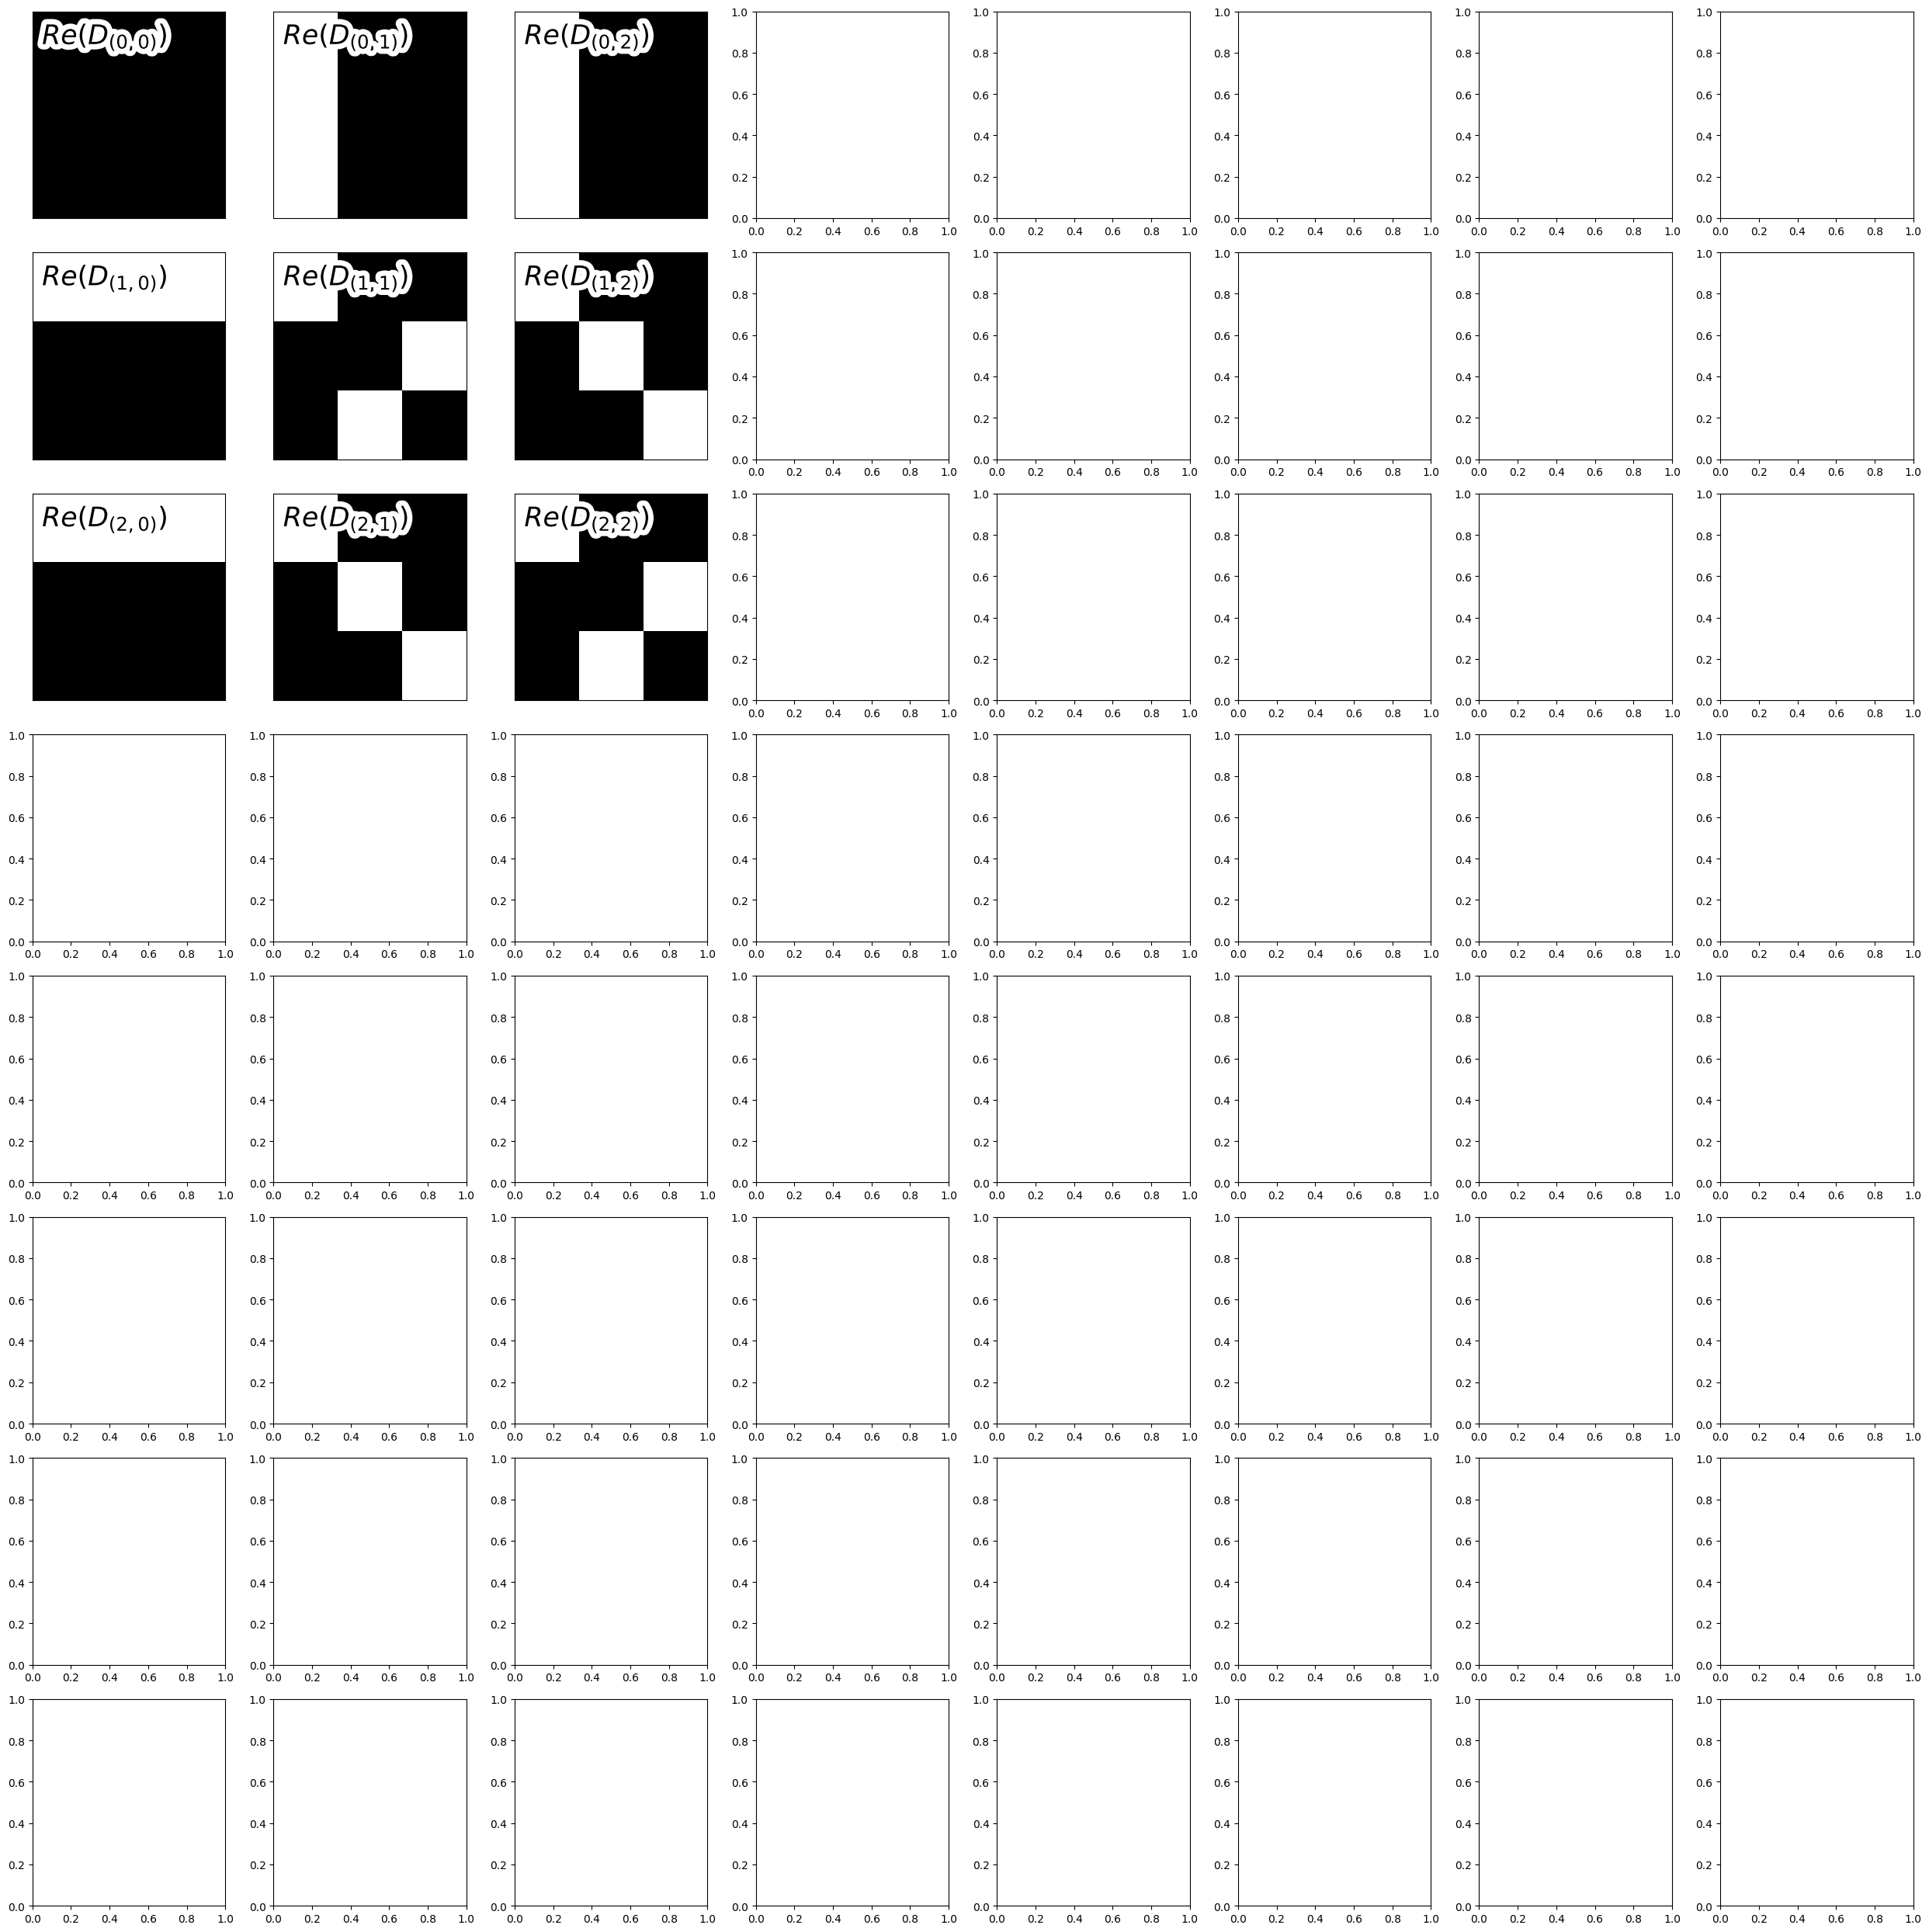

In [9]:
from matplotlib.patches import PathPatch
from matplotlib.text import TextPath
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as PathEffects

#plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

bins = 3
fig, axes = plt.subplots(8, 8, figsize=(25, 25))

'''vals = np.array([[dc_val, grad_x_val, grad_x2_val], 
 [grad_y_val, saddle_val, mix1_val],
 [grad_y2_val,mix2_val, laplace_val ]])'''


names = [[r'$\Sigma$', r'$\nabla_x$', r'$\nabla_x^2$'],
		 [r'$\nabla_y$', r'$\nabla_x\nabla_y$', r'$\nabla_y\nabla_x^2$'],
		 [r'$\nabla_y^2$', r'$\nabla_x\nabla_y^2$',r'$\nabla_x^2\nabla_y^2$']]

for i in range(0,3):
	for j in range(0,3):
		

		#x0,x1 = axes[i,j].get_xlim()
		#y0,y1 = 0, len(vals[0,0])
		dct_im = np.zeros((3,3))
		dct_im[i,j]=1
		#print(idct2(np.float16(dct_im)))
		#text = "%.4f" % np.mean(vals[i,j])
		axes[i,j].imshow(np.real(ifft2(np.float16(dct_im))), cmap='gray', aspect='auto',  interpolation='nearest', extent=(0, 255, 0, 255))
		txt = axes[i,j].text(0.05,0.95, f"$Re(D_{{ {i,j} }})$", size=25, color='black', transform=axes[i,j].transAxes, va='top')
		txt.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='w')])

		
		'''font_properties = FontProperties(family="cmb10", style='normal', size=60)
		text_path = TextPath((0,0), text, prop=font_properties)
		
		# Calculate the center of the text
		text_bbox = text_path.get_extents()
		text_width = text_bbox.width
		text_height = text_bbox.height
		center_x = 127.5 - text_width / 2
		center_y = 127.5 - text_height / 2

		# Translate the text path to the centered position
		text_path = TextPath((center_x,center_y), text,  prop=font_properties)


		# Create a PathPatch with a thick white edge (border)
		border_patch = PathPatch(text_path, edgecolor='white', linewidth=10, facecolor='none', antialiased=True)
		axes[i,j].add_patch(border_patch)

		# Create a PathPatch with normal face color (for the main text)
		text_patch = PathPatch(text_path, edgecolor='none', facecolor='black')
		#axes[i,j].add_patch(text_patch)'''

		axes[i,j].set_xticks([])
		axes[i,j].set_yticks([])

plt.tight_layout()
plt.savefig('example_dct.pdf', dpi=600)

plt.show()



In [10]:
np.imag(ifft2(np.float16(dct_im)))

array([[-0.        , -0.09622505,  0.09622505],
       [-0.09622505,  0.09622505, -0.        ],
       [ 0.09622505,  0.        , -0.09622505]], dtype=float32)

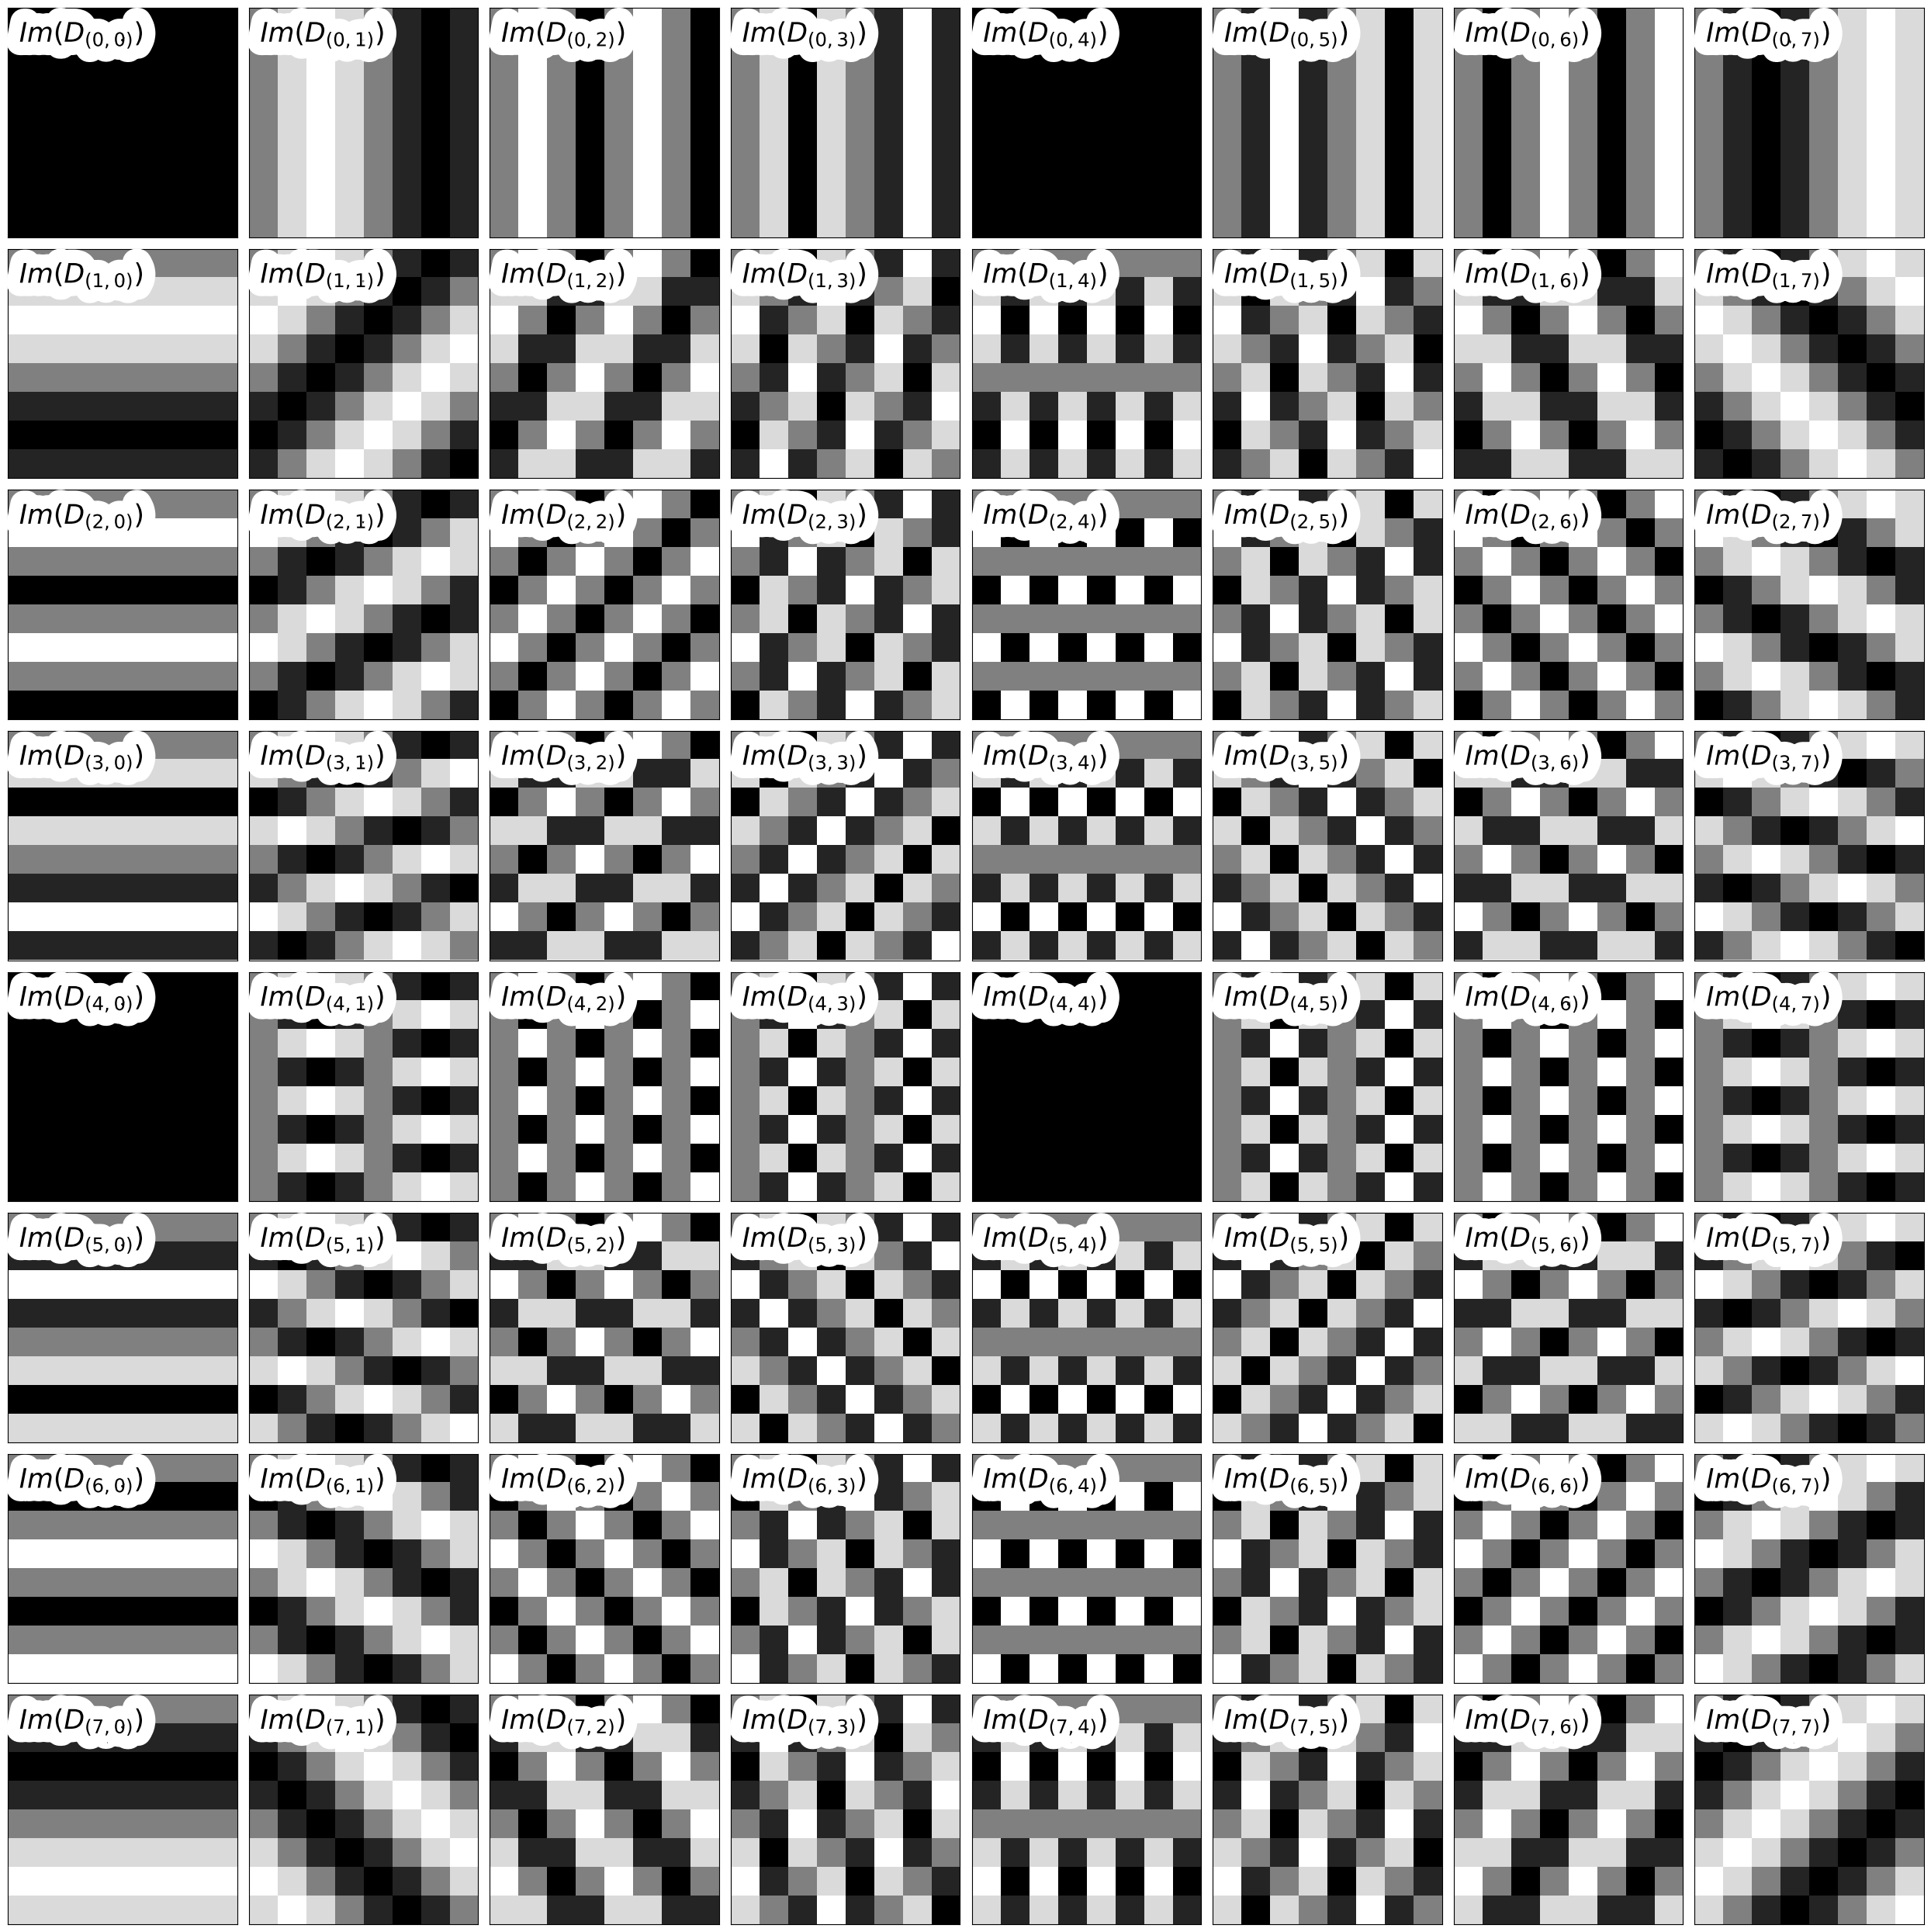

In [11]:
from matplotlib.patches import PathPatch
from matplotlib.text import TextPath
from matplotlib.font_manager import FontProperties
import matplotlib.patheffects as PathEffects

#plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '100'})

bins = 8
fig, axes = plt.subplots(8, 8, figsize=(25, 25))

'''vals = np.array([[dc_val, grad_x_val, grad_x2_val], 
 [grad_y_val, saddle_val, mix1_val],
 [grad_y2_val,mix2_val, laplace_val ]])'''


names = [[r'$\Sigma$', r'$\nabla_x$', r'$\nabla_x^2$'],
		 [r'$\nabla_y$', r'$\nabla_x\nabla_y$', r'$\nabla_y\nabla_x^2$'],
		 [r'$\nabla_y^2$', r'$\nabla_x\nabla_y^2$',r'$\nabla_x^2\nabla_y^2$']]

for i in range(0,8):
	for j in range(0,8):

		#x0,x1 = axes[i,j].get_xlim()
		#y0,y1 = 0, len(vals[0,0])
		dct_im = np.zeros((8,8))
		dct_im[i,j]=1
		#print(idct2(np.float16(dct_im)))
		#text = "%.4f" % np.mean(vals[i,j])
		axes[i,j].imshow(np.imag(ifft2(np.float16(dct_im))), cmap='gray', aspect='auto',  interpolation='nearest', extent=(0, 255, 0, 255))
		txt = axes[i,j].text(0.05,0.95, f"$Im(D_{{ {i,j} }})$", size=25, color='black', transform=axes[i,j].transAxes, va='top')
		txt.set_path_effects([PathEffects.withStroke(linewidth=25, foreground='w')])

		
		'''font_properties = FontProperties(family="cmb10", style='normal', size=60)
		text_path = TextPath((0,0), text, prop=font_properties)
		
		# Calculate the center of the text
		text_bbox = text_path.get_extents()
		text_width = text_bbox.width
		text_height = text_bbox.height
		center_x = 127.5 - text_width / 2
		center_y = 127.5 - text_height / 2

		# Translate the text path to the centered position
		text_path = TextPath((center_x,center_y), text,  prop=font_properties)


		# Create a PathPatch with a thick white edge (border)
		border_patch = PathPatch(text_path, edgecolor='white', linewidth=10, facecolor='none', antialiased=True)
		axes[i,j].add_patch(border_patch)

		# Create a PathPatch with normal face color (for the main text)
		text_patch = PathPatch(text_path, edgecolor='none', facecolor='black')
		#axes[i,j].add_patch(text_patch)'''

		axes[i,j].set_xticks([])
		axes[i,j].set_yticks([])

plt.tight_layout()
plt.savefig('example_dct.pdf', dpi=600)

plt.show()


In [12]:
np.sum(vals)

NameError: name 'vals' is not defined